# AST4310, Autumn 2021, Project 3

Authored by (candidate numbers): ***15508*** and ***15511***.


#### Header and imports

In [1]:
%%javascript  # Allow equation numbers
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants
from astropy.table import QTable  # to use tables with units
from astropy.visualization import quantity_support
from matplotlib_inline.backend_inline import set_matplotlib_formats

quantity_support()
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(10, 8))  # Larger figure sizes
plt.rc('image', origin='lower')  # Make image zero on bottom

In [3]:
# Path only valid in JupyterHub at UiO:
DATA_FILE = '/src/data/AST4310/SST_sunspot_617_2020.08.07.fits' 
data = QTable.read(DATA_FILE)
data

<QTable length=13>
              intensity [961,974]                ... wavelength
                 W / (Hz m2 sr)                  ...     nm    
                    float32                      ...  float64  
------------------------------------------------ ... ----------
   3.81328142395887e-08 .. 3.623370403715853e-08 ...    617.268
   3.768163381323575e-08 .. 3.59759475543342e-08 ...    617.276
  3.667330616963227e-08 .. 3.392468883589572e-08 ...    617.284
  3.548280247400726e-08 .. 2.985078495498783e-08 ...    617.288
3.0823972707594294e-08 .. 2.4031239220789757e-08 ...    617.292
2.3560883022355483e-08 .. 2.1409466199884264e-08 ...    617.296
  2.199313975381756e-08 .. 2.410669708297064e-08 ...      617.3
2.8138451568793243e-08 .. 2.8830916320998767e-08 ...    617.304
  3.368801060332771e-08 .. 3.283696869971209e-08 ...    617.308
  3.603156528697582e-08 .. 3.429122941156493e-08 ...    617.312
  3.674506743323036e-08 .. 3.534581693998007e-08 ...    617.316
 3.7092267035632176e-08 .. 3.529234504640044e-08 ...    617.324
  3.762441380672499e-08 .. 3.555012284550685e-08 ...    617.332

## INTRODUCTION

In this project we will analyse a region of the solar surface by using data from the Swedish 1-m Solar Telescope (SST) at La Palma. The data set contains intensity and stokes V (circular polarisation) data in three dimensions: two spatial and one spectral. The spectral dimension consists of 13 wavelengths covering the iron spectral line, Fe I. From our dataset we can estimate temperature, velocity, magnetic field, line width etc. of points on the solar surface and we will use this to examine the dynamics of the granulations, intergranular lanes and sunspots covered by the data set. The motivation for this is to uncover properties of a sunspot.

## METHODS

### Line width and center

To find the line centers and widths we could fit a Gaussian, but it is a lot simpler and less computatinally expensive to find the moments. From the project description we see that we can find the mean $\mu$ (the central wavelength) and the variance $\sigma^2$ at all the observed points by calculating the following expressions

\begin{align*}
    \mu &= \frac{\int \lambda I_\lambda \text{d}\lambda}{\int I_\lambda \text{d}\lambda} \\
    \sigma^2 &= \frac{\int (\lambda-\mu)^2 I_\lambda \text{d}\lambda}{\int I_\lambda \text{d}\lambda}
\end{align*}

### Brightness temperature

The brightness temperature $T_b$ is the temperature for which the Planck function $B_\nu(T_b)$ gives the same intensity as the observed intensity $I_\nu^\text{obs}$. Aside from the spectral lines, the solar spectrum has the shape of a Planck function. The brightness temperature for the continuum of the spectra thus give an estimation of the actual temperature. Solving this equation for $T_b$ we have

\begin{align*}
    B_\nu(T_b) = \frac{2hv^3}{c^2}\frac{1}{e^{h\nu/kT_b} - 1} &= I_\nu^\text{obs} \\
    (e^{h\nu/kT_b} - 1)^{-1} &= \frac{I_\nu^\text{obs}c^2}{2hv^3} \\
    e^{h\nu/kT_b} &= \frac{2hv^3}{I_\nu^\text{obs}c^2} + 1 \\
    h\nu/kT_b &= \ln\left(\frac{2hv^3}{I_\nu^\text{obs}c^2} + 1 \right).
\end{align*}

This gives the brightness temperature as a function of the observed intensity:

\begin{align*}
    T_b(I_\nu^\text{obs}) = \frac{h\nu}{k\ln\left(\frac{2hv^3}{I_\nu^\text{obs}c^2} + 1 \right)}
\end{align*}



### Velocities

Since we have the intensity data around the Fe I line, with central wavelength $\lambda_0 = 617.334$ nm, we can find the velocities of the solar surface through the Doppler effect from how far the line centers have shifted from $\lambda_0$. We previously estimated the line centers $\mu$ from the data. Using $\lambda = \mu$ we can find the velocity through the formula

\begin{align*}
    \frac{v_\text{los}}{c} = \frac{\lambda_0 - \lambda}{\lambda_0}
\end{align*}

where we have written $v_\text{los}$ as we only observe the line of sight component of the velocity. To find the velocity $v$ normal to the surface we have that

\begin{align*}
    v = \frac{v_\text{los}}{\cos\theta}
\end{align*}

where $\theta$ is the angle between the line of sight and the normal of the surface. For observations taken at position (x,y), i.e. a distance $d = \sqrt{x^2 + y^2}$ from the solar disk centre, we have the following diagram.

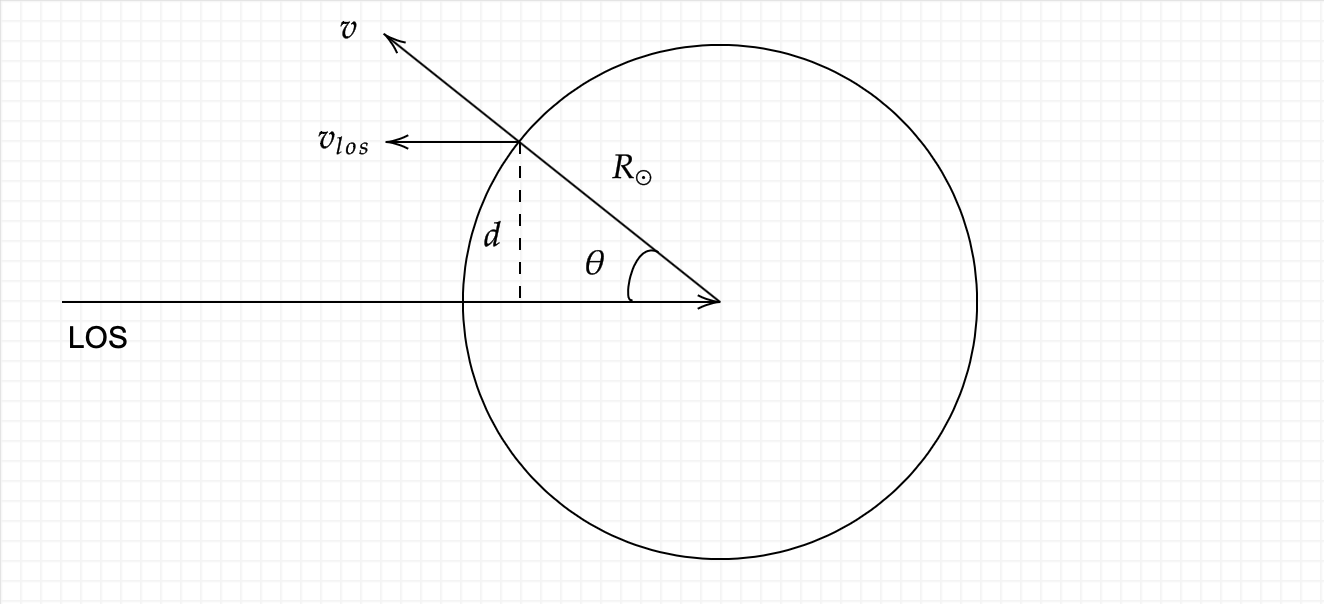

Where $R_\odot$ is the solar radius. From the diagram, we can see that

\begin{align*}
\sin\theta = \frac{d}{R_\odot}
\end{align*}

This gives an expression for $\cos\theta$:

\begin{align*}
    \cos\theta = \cos\left(\sin^{-1}\left(\frac{d}{R_\odot}\right)\right) 
    = \sqrt{1 - \sin^2\left(\sin^{-1}\left(\frac{d}{R_\odot}\right)\right)}
    = \sqrt{1- \left(\frac{d}{R_\odot}\right)^2}
\end{align*}

where we used the identity $\cos^2x + \sin^2x = 1$. Our expression for $\cos\theta$ gives us that the total velocity normal to the solar surface is

\begin{align*}
    v = \frac{v_\text{los}}{ \sqrt{1- \left(\frac{d}{R_\odot}\right)^2}}
\end{align*}

We are here assuming that the area we are observing is small enough that the angle does not vary greatly inside the observed area itself. 
Since we are observing a part of the sun offset from its rotational axis, our observations will be Doppler shifted as a result of the sun's rotation. The right hand side of the diagram below illustrates this.

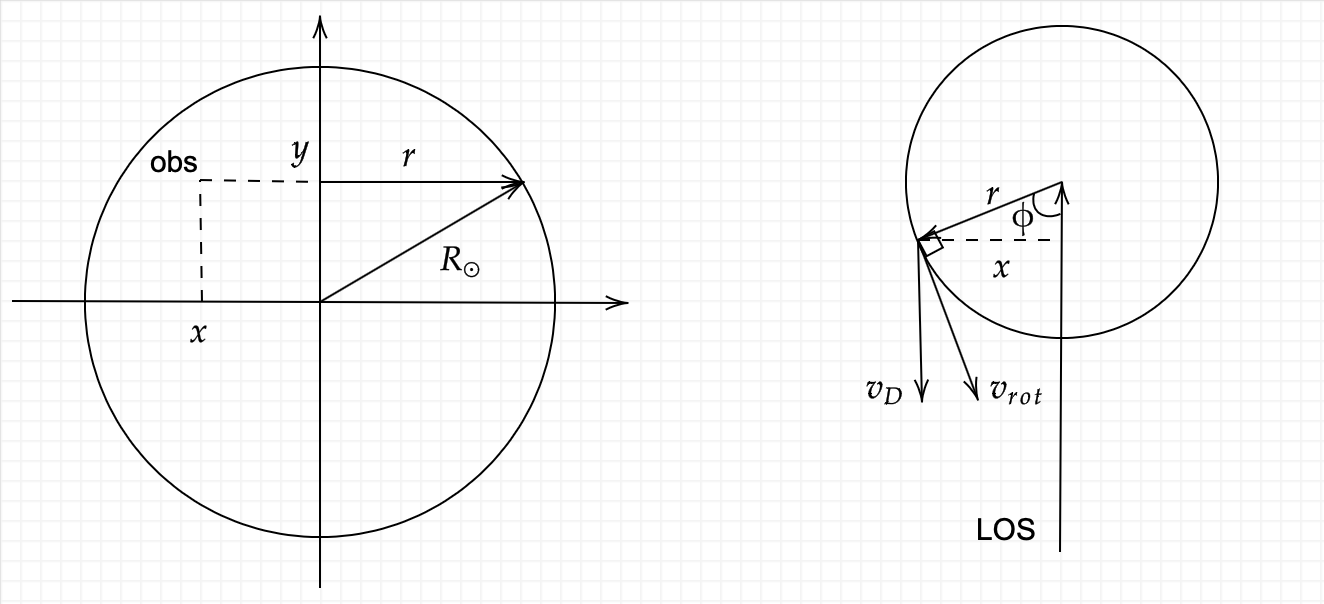

Here $v_\text{rot}$ is the rotational velocity of the surface at the point we are observing and $\phi$ is the angle between the point of observation and the line of sight in the rotational plane of the sun. The $r$ denotes the distance from the rotational axis at our point of observation. We see that this gives a velocity shift due to Doppler

\begin{align*}
    v_D = v_\text{rot}\sin\phi
\end{align*}

From the right hand side of the diagram we see that $\sin\phi = x/r$. The rotational velocity at our point of observation can be written as the circumference around the axis of rotation (i.e. the distance travelled in one rotation of the sun), divided by rotational period of the sun, $T_\text{rot}$. The circumference is simply $2\pi r$, which gives us a Doppler shift of

\begin{align*}
v_D = (2\pi r \frac{x}{r})/T_\text{rot} = 2\pi x/T_\text{rot}
\end{align*}

Thus, $v = (v_\text{los} - v_D)/\cos\theta$ should give us the actual velocities normal to the solar surface. 

### Magnetic field

To determine the magnetic field we use the circular polarisation of light, named Stokes V in our dataset. We use this measure alongside the gradient of intensity with respect to wavelength to calculate the line of sight magnetic field strength:

\begin{align*}
    B_{\rm los} &= -\frac{4\pi m_e c}{e \bar{g}\lambda_0^2}\frac{\sum_\lambda \frac{\partial I}{\partial \lambda} V_\lambda}{\sum_\lambda \left(\frac{\partial I}{\partial \lambda} \right)^2}
\end{align*}

Where $\bar{g}$ is the effective Landé factor, a measure the magnetic sensetivity of our line at $\bar{g}=2.499$. The factor $V_\lambda$ is the circular polarisation, Stokes V, and $m_e, c, e$ are the electron mass, speed of light, and electron charge respectively. This equation is only valid for a weak field approximation, which is not necessarily valid for our sunspots but is assumed for simplicity.

The magnetic field also has an effect on the emitted spectral lines in the form of Zeeman splitting. This Zeeman effect is a separation of magnetically sensitive spectral lines into several different components. For widths $\Delta\lambda_B < \Delta\lambda_D$ though we expect these lines to instead appear as a single, larger line as opposed to several fully separated ones. This separation $\Delta \lambda_B$ due to the magnetic field is given by:

\begin{align*}
    \Delta \lambda_B &= \frac{e}{4\pi m_e c}\lambda_0^2 B
\end{align*}

Here we do not actually know the size $B$, as it is the actual magnetic field strength and not our observed quantity $B_{\rm los}$. These are related by $B\cos{\theta} = B_{\rm los}$, where $\theta$ is the angle between the magnetic field vector and line of sight. This can still be used to get an estimate of Zeeman splitting however, as we assume the observed field to be of similar order to the actual field. This approximation would return a value of same order for 90% of cases, as $|\cos(\theta)| \in [0.1, 1]$ would give same order (and assuming even distributions of $\theta$, which should be valid for magnetic field arcs).

### Spectral analysis

To get a better understanding of the inner workings of the sunspot, we compare the spectral lines resulting from different areas across the star. We are especially interested in comparing the sunspot with the normal surface granulation. In addition we include a point in the inter granular lane and a sun-pore to investigate possible differences.

This is the part where we combine all our findings so far, using the statistical fitting, velocity, temperature, and magnetic field to try to get an understanding of the spectra. Their relative positions and size could tell us more about what could be happening in a sunspot. A better visual measure of their breadth is the full width at half maximum (FWHM) which we can find through the variance $\sigma^2$:

\begin{align*}
    {\rm FWHM} &= 2\sqrt{2\ln{2}}\sigma
\end{align*}

## RESULTS AND DISCUSSION

To get an idea of the sizes involves we will plot the continuum intensity next to a scaled image of the earth.

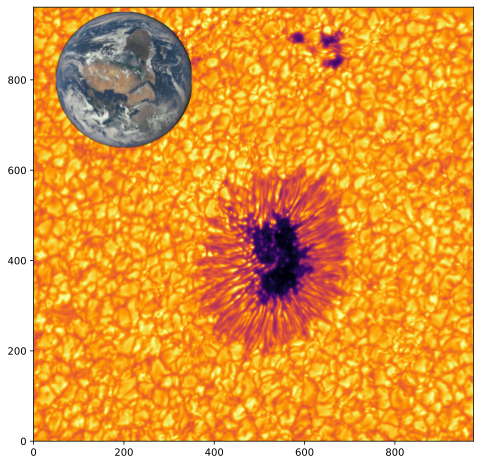

In [4]:
plt.imshow(data["intensity"][0], cmap="inferno", vmax=4.6e-8)

import matplotlib.image as mpimg
img = mpimg.imread('earth_cropped_space-removed.png')

R_earth = 6371 * units.km #average radius of earth
pixe_y, pixe_x = 2*R_earth/len(img), 2*R_earth/len(img[0]) #size of pixels in earth image

pix = 42.46 * units.km #pixel size on surface of sun
dy, dx = len(img) * pixe_y/pix, len(img[0]) * pixe_x/pix #pixel width of earth fitted to sun
r0y, r0x = (800, 200) #centre of where earth should be placed

plt.imshow(img, extent=(r0x-dx/2, r0x+dx/2, r0y-dy/2, r0y+dy/2))
plt.ylim(0, len(data["intensity"][0]))
plt.xlim(0, len(data["intensity"][0,0]));

 *Photo of earth taken from Wikipedia Commons*

We see that the central sunspot (including the penumbra) is approximately the size of the entire earth.

### Line width and center

We find the line centers and variance like discussed in the methods section.

In [5]:
wavelength = data['wavelength']
intensity_inv = data["intensity"][0,:,:] - data["intensity"]

mu = numpy.trapz(wavelength[:,numpy.newaxis,numpy.newaxis]*intensity_inv,wavelength,axis=0)\
    /numpy.trapz(intensity_inv,wavelength,axis=0)

variance = abs(numpy.trapz(((wavelength[:,numpy.newaxis,numpy.newaxis] - mu)**2)*intensity_inv,wavelength,axis=0)\
            /numpy.trapz(intensity_inv,wavelength,axis=0))

### Brightness temperature

We find the brightness temperature by plugging the observed intensity into the equation for $T_b(I_\nu^\text{obs})$. Since the solar intensity behaves similarly to a Planck function outside of spectral lines we choose the intensity value for the smallest observed wavelength, as it is far from the Fe I line center.

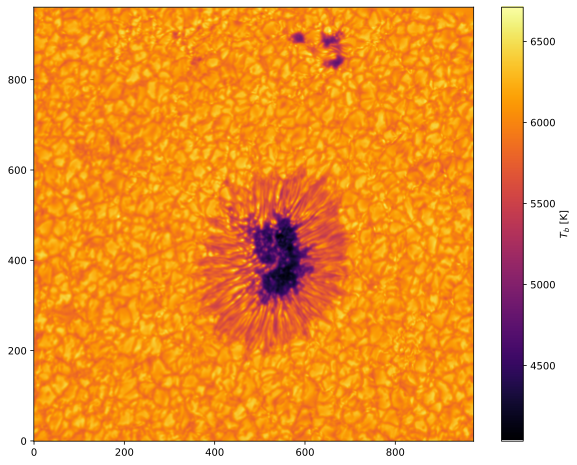

In [6]:
intensity = data["intensity"][0,:,:]
wave = data["wavelength"][0]
freq = constants.c/wave

def brightness_temp(I_nu,nu):
    """
    Returns brightness temperature in units Kelvin for observed intensity I_nu at frequency nu
    """
    h,c,k_B = constants.h,constants.c,constants.k_B
    return (h*nu/(k_B*numpy.log(2*h*nu**3/(I_nu*units.sr*c**2) + 1))).to("K")

T_b = brightness_temp(intensity,freq)

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(T_b.value,cmap="inferno")
plt.colorbar(im,label=r"$T_b$ [K]");

In the image above we can make out features such as the granules, the intergranular lanes, the smaller sunspots/pores as well as the largest sunspot in the centre with its umbra and penumbra. We see that the sunspots are significantly cooler than the solar granulation. Finding the brightness temperature at coordinate $(200,200)$ we find an estimate for the temperature of the solar granulation:

In [7]:
T_b[200,200]

<Quantity 6174.9624 K>

Inside the central sunspot, at coordinates $(400,550)$ we have a temperature of

In [8]:
T_b[400,550]

<Quantity 4441.201 K>

We see that there is a temperature difference of almost 2000 degrees Kelvin. Since we have that the sun radiates like a blackbody (apart from spectral lines) we know that the Planck function describes the radiated intensity. Thus, the relatively low temperatures is what makes the sunspots dark. They are only dark relative to the rest of the solar surface, however. A blackbody with temperature $\sim4000$ K would appear very bright on its own.

The intergranular lanes are also cleary cooler than the granulations, but not by as much. The granules do resemble bubbles in a boiling liquid, which suggests the lanes are gas moving down into the sun after cooling at the surface. We can get more information about this by finding the normal velocity.

### Velocities

To find the distance from the solar disk centre we can use that our coordinates in arcseconds are $(x,y) = (-473'',248'')$, and that the radius of the sun in arcseconds is $R_\odot = 948''$. This means we can redefine the coordinates as

\begin{align*}
    x &= -\frac{473}{948}R_\odot \\
    y &= \frac{248}{948}R_\odot 
\end{align*}

Thus we can find $d = \sqrt{x^2 + y^2}$ from which we can find $\cos\theta$.

In [9]:
R_sun = constants.R_sun

x = 473/948*R_sun
y = 248/948*R_sun
d = numpy.sqrt(x**2 + y**2)

costheta = numpy.sqrt(1 - (d/R_sun)**2)

We see that the normal of the surface at the point on the solar surface we are observing is at an angle of

In [10]:
numpy.arccos(costheta).to("deg")

<Quantity 34.28898246 deg>

to the line of sight. We can now find the velocity normal to the solar surface.

The code below calculates the velocities from our estimates of the central wavelength. This is done the way we discussed in the methods section. We assume here that the sun takes 27 days to rotate about its axis. In reality, the rotational period of the is not constant with latitude and it is therefore hard to say exactly how fast the rotational velocity is at our point of observation. 

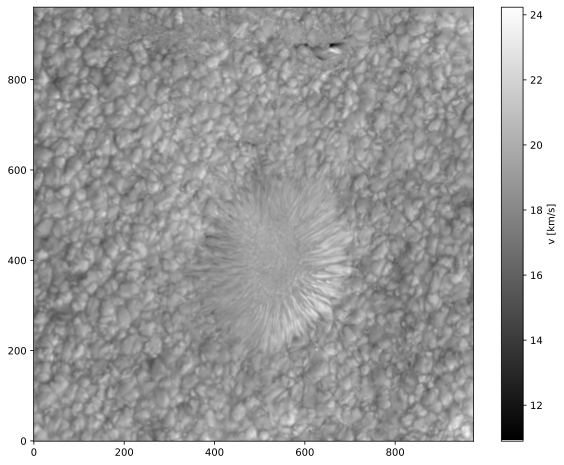

In [11]:
def velocity(wave,wave0):
    """
    Returns doppler velocity from wavelength wave and central wavelength wave0
    """
    return (constants.c*(wave0-wave)/wave0).to("km s-1")

wave0 = 617.334*units.nm

T_rot = 27*24*60*60*units.s
v_D = (2*numpy.pi*x/T_rot).to("km s-1")

v = (velocity(mu,wave0) - v_D)/costheta

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(v.value,cmap="gist_gray")
plt.colorbar(im,label="v [km/s]");

The image above shows the velocity of the solar surface. Positive velocities indicate blueshift, i.e. that the gas is moving towards us. The first thing to notice is that all the velocities are positive. In our case, no gas is moving slower than 

In [12]:
numpy.min(v)

<Quantity 10.894102 km / s>

towards us. If we were to take this at face value, it would mean that the entire solar surface is moving upwards, out of the sun. Some stars expand and contract, in which case this result might make sense, but our sun does not. Other explanations could be that the sun is moving in relation to us in some way we did not account for. We removed the Doppler shift from the rotation of the sun, but we didn't think of the earth's rotation or the relative velocity between the earth and the sun. The problem is that our calculated velocities are very big; to center the velocities around zero we have to find that we in some way are moving an order of 10 km/s in relation to the point of the sun we are observing. The rotational velocity of the sun is at a maximum

In [13]:
(2*numpy.pi*R_sun/T_rot).to("km s-1")

<Quantity 1.87380488 km / s>

which is a lot smaller than 10 km/s, and the earth's rotational velocity is even slower. The remaing relative velocity is the radial velocity of the earth in its orbit. However, considering the earth's orbit is very close to circular and that the orbital speed is about 30 km/s, it seems unlikely that this would explain our results.

Since we are pretty sure the solar surface is not actually moving out of the sun (sun is in hydrostatic equilibrium), we should be able to assume that the mean velocity is zero; some parts of the surface move out of, and some move into the sun. This would also be the same as assuming the actual central wavelength of Fe I to be the mean central wavelength of our intensity observations. Making this assumption, we can find out what parts of the solar surface are moving outwards and what parts are moving inwards. The new Fe I line central wavelength becomes 

In [14]:
wave0 = numpy.mean(mu)
wave0

<Quantity 617.30033698 nm>

so that $\lambda_0 \approx 617.300$ nm. With this, we can make a velocity plot centered around zero. We will make it so the gas moving towards us is blue, indicating blueshift, and the gas moving away from us is red, indicating redshift.

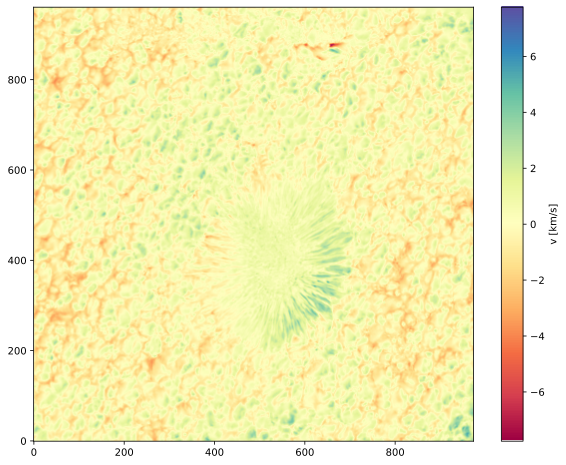

In [24]:
v = velocity(mu,wave0)/costheta

fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(v.value,vmax = abs(numpy.min(v).value),cmap="Spectral")
plt.colorbar(im,label="v [km/s]");

The most noticable features in the velocity map are the granulations, the intergranular lanes, and the central sunspot. It a little bit difficult to make out details in this map. To inspect the velocity and temperature of the granulations and intergranular lanes further, we can zoom in on an area with only these features and make an animation that blinks between the brightness temperature image and the velocity image.

In [16]:
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
im1 = ax.imshow(T_b[:200,:200].value, cmap='inferno')
plt.colorbar(im1,fraction=0.046, pad=0.01,label="$T_b$ [K]");
im2 = ax.imshow(v[:200,:200].value,vmax = abs(numpy.min(v[:200,:200]).value),cmap="Spectral")
plt.colorbar(im2,orientation="horizontal",fraction=0.046, pad=0.04,label="$v$ [km/s]");

anim = ArtistAnimation(fig, [[im1], [im2]], interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())

We can very clearly see that the granulations are moving towards us, while the intergranular lanes are moving away. The granulations are also hotter, as we can see from the brightness temperature image. This indicates that gas moves up to the sun's surface in the granules and sinks back in in the intergranular lanes, analogous to a boiling liquid. The granules would be bubbles of gas rising up to the surface and sinking back in again after cooling.

To analyse the velocities and temperatures in the central sunspot, we can zoom in and blink between temperature and velocity again:

In [17]:
fig, ax = plt.subplots()
im1 = ax.imshow(T_b[200:600,350:700].value, extent=(350,700,200,600), cmap='inferno')
plt.colorbar(im1,fraction=0.046, pad=0.01,label="$T_b$ [K]");
im2 = ax.imshow(v[200:600,350:700].value,vmax = abs(numpy.min(v[200:600,350:700]).value),\
                extent=(350,700,200,600),cmap="Spectral")
plt.colorbar(im2,orientation="horizontal",fraction=0.040, pad=0.04,label="$v$ [km/s]");

anim = ArtistAnimation(fig, [[im1], [im2]], interval=1000, blit=True)
plt.close(fig)
HTML(anim.to_jshtml())

Compared to the "boiling" of the granulations and intergranular lanes, the umbra of the central sunspot has a pretty even velocity distribution. In general it seems to be moving down, but the movement is pretty slight and we don't really know exactly where the velocity is zero (we just estimated it by assuming the surface as a whole is stationary). It might be that the gas in the sunspot is stationary. At the very least it's clear that there is no bubbling of gas in the sunspot like we saw in the granulations. The penumbra has the largest velocities in the sunspot, showing both positive and negative velocities. These are concentrated along lines pointing into the umbra. We will see later that these lines coincide with strong magnetic fields. The velocities here are therefore likely caused by magnetic activity.

### Magnetic field

Since we do not know the actual magnetic field strength $B$, just our measured quantity $B_{\rm los}$, we cannot actually calculate the Zeeman splitting accurately. We lack the direction of the magnetic field lines, determined by the unknown angle $\theta$ between $B$ and our line of sight. Note that this is a different angle to the one used to calculate the velocity before.

However if we make the assumption that the magnetic field is on the same order as our measured value, then we can calculate $\Delta\lambda_B$ to determine if the scale is enough to affect the lines by a significant amount. The following code block uses this assumption to plot the Zeeman width across our observation area.

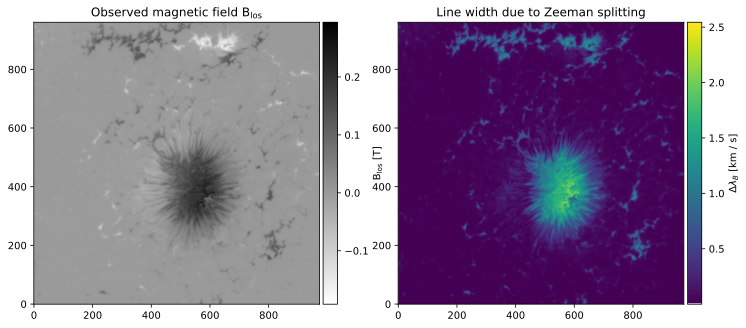

In [18]:
I = data["intensity"]
stokes_v = data["stokes_v"]
lam = data["wavelength"]
lam_mean = 617.30034 * units.nm #wavelength corresponding to a shift of mean(velocity) of Fe I

I_grad = numpy.gradient(I, lam, axis=0) #derivative of intensity in each point, with respect to wavelength
g_lande = 2.499
m_e = constants.m_e
c = constants.c
e = constants.e.si #SI version of e
B_los = (-4*numpy.pi*m_e*c/(e*g_lande*lam_mean**2) * numpy.nansum(I_grad * stokes_v, axis=0)/numpy.nansum(I_grad**2, axis=0)).to("T")
del I_grad

dlamB = (constants.e.si/(4*numpy.pi*constants.m_e*constants.c) * lam[0]**2 * B_los *constants.c/lam_mean).to("km/s")

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

im1 = ax[0].imshow(B_los, cmap="gist_gray_r")
divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1, orientation='vertical', label=r"B$_{\rm los}$ [T]")
ax[0].set_title(r"Observed magnetic field B$_{\rm los}$")

im2 = ax[1].imshow(abs(dlamB), cmap="viridis")
divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax2, orientation='vertical', label="$\Delta\lambda_B$ [{}]".format(dlamB.unit))
ax[1].set_title("Line width due to Zeeman splitting");

At the left we see the magnetic field along the line of sight for our dataset. The units are given in tesla with a reference colorbar showing field strength with a grayscale coloring. The sign of the magnetic field is the direction of the field along the line of sight component. With our definition the positive values are directed toward the observer, while negative values are directed away from the observer. Our angle of observation is not quite perpendicular to the surface, but an approximate interpretation is that positive fields point out of the surface while negative fields point into the surface.

We can see that there is a great amount of activity within the sunspot and sunpores. High activity can also be seen in 'cracks' along the surface, showing magnetic activity is not limited to the sunspot. These cracks seem to line up with the intergranular lanes, but is only of visible strength near the sunspot, possibly connecting them. The strongest magnetic fields observed are in the umbra of the sunspot, with the field in the penumbra and sunpores being only slightly weaker.

To the right we see a plot of the estimated Zeeman splitting due to the magnetic field. The units of $\Delta\lambda_B$ were converted to km/s using the doppler-shift with central wavelength at $\lambda_{\rm mean} = 617.30034$ nm. We can see that the features match against what we observed for the magnetic field. Following our assumption of equal order of $B$ and $B_{\rm los}$, we can see that the splitting is of significant size and could affect the spectral lines in these areas. We will come back to these in the spectral analysis as a possible factor.

### Spectral analysis

The following code block shows our selection of points which we will use for spectral analysis.

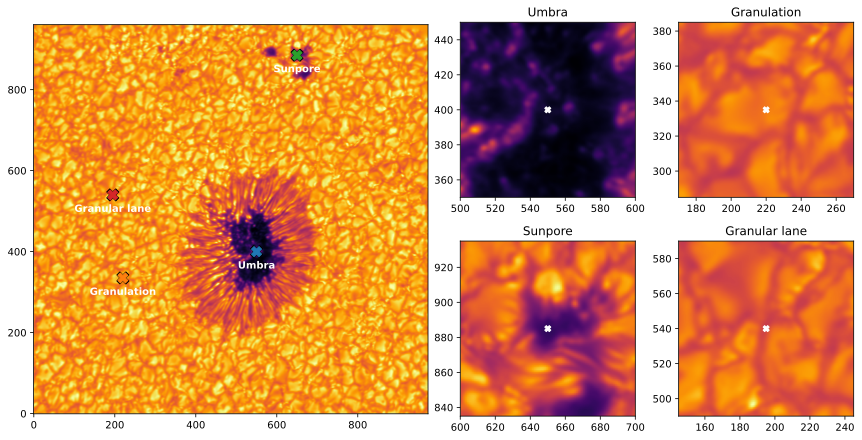

In [19]:
points = [(550, 400, "Umbra"),
          (220, 335, "Granulation"),
          (650, 885, "Sunpore"),
          (195, 540, "Granular lane")]

fig = plt.figure(constrained_layout=True, figsize=(12, 6))
gs = fig.add_gridspec(2, 4)
ax = [fig.add_subplot(gs[:, :2]),
      fig.add_subplot(gs[0, 2]),
      fig.add_subplot(gs[0, 3]),
      fig.add_subplot(gs[1, 2]),
      fig.add_subplot(gs[1, 3])]

delta = 50 #determines "zoom level" of individual points
ax[0].imshow(I[0], cmap="inferno", vmax=4.6e-8) #main image
for i, point in enumerate(points): #plotting for each point
    ax[0].plot(point[0], point[1], "kX", markersize=12, label=point[2]) #x,y indexing
    ax[0].plot(point[0], point[1], "X", markersize=10, label=point[2])
    ax[0].text(point[0], point[1] - 35, point[2], color="w", verticalalignment="center", horizontalalignment="center", weight="black")
    x0, x1 = point[0]-delta, point[0]+delta
    y0, y1 = point[1]-delta, point[1]+delta
    I_min, I_max = numpy.nanmin(I[0]), numpy.nanmax(I[0])
    ax[i+1].imshow(I[0][y0:y1, x0:x1], cmap="inferno", extent=(x0, x1, y0, y1), vmin=I_min.value, vmax=I_max.value)
    ax[i+1].plot(point[0], point[1], "wX")
    ax[i+1].set_title(point[2])

At the left side of the plot we see an overview of our field of view with chosen points marked. To also display the finer structure in the surrounding area we also show zoomed in cutouts at the right hand side.

We pull the spectral line data from the selected points and plot the line profiles using the code block below.

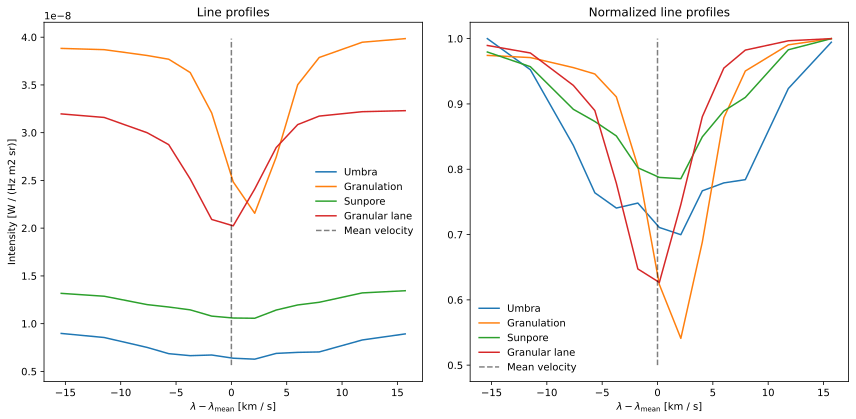

In [25]:
I_points = [I[:, point[1], point[0]] for point in points] #y,x indexing
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

v_lam = ((lam_mean-lam)/lam_mean * constants.c).to("km s-1") #shifting wavelength to units of km/s

[ax[0].plot(v_lam, I_point, label=points[i][2]) for i, I_point in enumerate(I_points)]
ax[0].plot(numpy.array([0, 0]), [numpy.nanmin(I_points)*0.9, numpy.nanmax(I_points)], "k--", label="Mean velocity", alpha=0.5)
ax[0].legend()
ax[0].set_title("Line profiles")
ax[0].set_xlabel(r"$\lambda - \lambda_{\rm mean}$"+" [{}]".format(v_lam.unit))
ax[0].set_ylabel("Intensity [{}]".format(I_points[0].unit))

[ax[1].plot(v_lam, I_point/numpy.nanmax(I_point), label=points[i][2]) for i, I_point in enumerate(I_points)]
ax[1].plot(numpy.array([0, 0]), [0.5, 1], "k--", label="Mean velocity", alpha=0.5)
ax[1].legend()
ax[1].set_title("Normalized line profiles")
ax[1].set_xlabel(r"$\lambda - \lambda_{\rm mean}$"+" [{}]".format(v_lam.unit))

plt.tight_layout()

These plots show the line profiles for four different points across the solar surface. The vertical line marks the mean velocity, corresponding to a wavelength of $\lambda_{\rm mean} = 617.30034$ nm. To the left is the figure showing line profiles for absolute values, while the right figure has normalised profiles. This is in order to be able to compare both size and shape of different profiles. There is a clear separation into two groupings. We have two strong lines, with an average intensity of 3-4 times the intensity of the others. And then we have two broad lines, which have a lower intensity overall but a much broader width.

The line profiles for granulation and granular lane confirm our previous findings regarding their velocity. The centre of these lines are clearly shifted away from the central wavelength, meaning they have a velocity compared to the surface. The granulation has a positive velocity, indicating movement towards the line of sight. While the granular lane has a weaker but still clear shift towards negative velocity, indicating movement away from the line of sight. These can then approximately be interpreted as movement out (granulation) and in (lane) to the star, which is the same as we found previously.

While we can clearly see a difference in width for the sunspot/pore, we want to get a numerical measure of this. We calculate their full width at half maximum in the following code block:

In [21]:
for point in points:
    FWHM = 2*numpy.sqrt(2*numpy.log(2)*variance[point[1], point[0]])
    FWHM = (FWHM/lam_mean * constants.c).to("km s-1")
    print("{:<14s}: {:>.2e}".format(point[2], FWHM))

Umbra         : 1.38e+01 km / s
Granulation   : 1.08e+01 km / s
Sunpore       : 1.35e+01 km / s
Granular lane : 9.52e+00 km / s


This shows that the spectral lines for the Umbra and Sunpore are much wider than the normal surface. Though at first this does not seem to make sense, as the largest factor in broadening is the doppler broadening $\Delta\lambda_D$. This broadening is dependent on the temperature, as the increased movement of particles cause the change in wavelength. However our sunspot was previously shown to be colder than the surrounding surface.

Another explanation could be the Zeeman effect $\Delta\lambda_B$ caused by the magnetic field. As argued previously we cannot know the broadening caused by this effect with our data, but we can estimate it as being likely near the same order of magnitude as the real broadening using observed data. For our four points this gives the following calculation:

In [22]:
for point in points:
    print("{:<14s}: {:>.2e}".format(point[2], abs(dlamB[point[1], point[0]])))

Umbra         : 1.67e+00 km / s
Granulation   : 1.16e-02 km / s
Sunpore       : 9.22e-01 km / s
Granular lane : 1.15e-02 km / s


As expected the factors are much larger in the magnetically active regions, by a couple orders of magnitude. Although we do not know their precise effect, this does present a possible explanation for the broader lines. We can also support this further by plotting the FWHM for all points in our field of view, then comparing with the observed magnetic field:

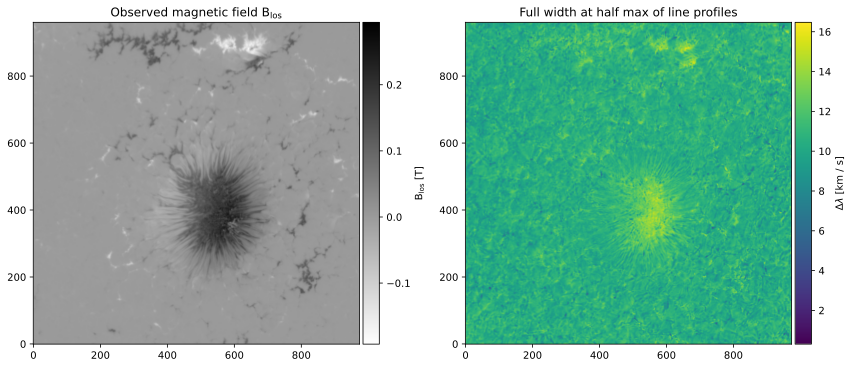

In [23]:
import warnings; warnings.filterwarnings('ignore') #ignoring the warning from sqrt(NaN)

FWHM = (2*numpy.sqrt(2*numpy.log(2)*variance) /lam_mean * constants.c).to("km s-1")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

im1 = ax[0].imshow(B_los, cmap="gist_gray_r")
divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1, orientation='vertical', label=r"B$_{\rm los}$ [T]")
ax[0].set_title(r"Observed magnetic field B$_{\rm los}$")

im2 = ax[1].imshow(FWHM, cmap="viridis")
divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax2, orientation='vertical', label="$\Delta\lambda$ [{}]".format(FWHM.unit))
ax[1].set_title("Full width at half max of line profiles")
plt.tight_layout()
del FWHM

While only intended as a superficial comparison, we can see that the same structures appear in both plots. This could suggest the width of the lines are caused in some part by the underlying magnetic field, since the temperature is not enough alone to explain the broadened curves.

## CONCLUSION

In our analysis of sunspots on the solar surface we have found that the sunspots are significantly cooler, by about $2000$ K, than the granulations and intergranular lanes around them. This is turn is what affects their intensity and makes them darker than the solar surface in general. We have found that gas in the umbra of the sunspots is pretty stationary, in stark contrast with the gas outside them, which seems to behave analogous to a boiling liquid. In the penumbra, we observed higher velocities, which seemed to follow the magnetic field. Both the sunspot and sunpores had significant magnetic activity, reaching values of $0.2$ Tesla. This was also part in explaining the spectral line profiles, as the sunspot had a very broad profile which did not seem to be caused by temperature. 